In [ ]:
import pandas as pd
import random
import numpy as np
from datetime import timedelta, date

# Function to generate random dates
def random_dates(start_date, end_date, n=10):
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    return [(start + timedelta(days=random.randint(0, int((end - start).days)))).strftime('%Y-%m-%d') for _ in range(n)]

# Sample data
names = ["John Doe", "Jane Smith", "Emily Davis", "Michael Brown", "Sarah Johnson",
         "William Taylor", "Olivia Martin", "James Wilson", "Linda Thomas", "Barbara Jones",
         "Robert Harris", "Jennifer Clark", "Maria Lewis", "David Walker", "Susan Lee",
         "Joseph Hall", "Margaret King", "Thomas Baker", "Carol White", "Sarah Young"]

# Define 8 unique products
products = ["Laptop", "Smartphone", "Headphones", "Tablet", "Camera",
            "Smartwatch", "Speakers", "E-reader"]

# Define realistic prices for each product
product_prices = {
    "Laptop": 800,
    "Smartphone": 600,
    "Headphones": 100,
    "Tablet": 400,
    "Camera": 700,
    "Smartwatch": 250,
    "Speakers": 150,
    "E-reader": 250
}

purchases = random.choices(products, k=20)

# Create a DataFrame
data = {
    "Name": random.choices(names, k=20),
    "Age": random.choices(range(18, 71), k=20),
    "Product Purchased": purchases,
    "Price": [product_prices[product] for product in purchases],  # Match price to product
    "Date": random_dates("2022-01-01", "2022-12-31", 20),
}

# Add warranty data
warranty_options = ["1 year", "2 years", "3 years", "N/A"]

warranty = random.choices(warranty_options, k=20)
# Replace "N/A" with NaN
warranty = [np.nan if w == "N/A" else w for w in warranty]

data["Warranty"] = warranty


# Creating a DataFrame
df = pd.DataFrame(data)

# Add a few Nan values
for _ in range(5):
    row = random.randint(0, len(df) - 1)
    col = random.choice(df.columns)
    df.at[row, col] = np.nan
# Display the DataFrame
print(df)


              Name  Age Product Purchased  Price        Date Warranty
0    Margaret King   51          E-reader  250.0  2022-01-12      NaN
1      Carol White   23        Smartphone    NaN  2022-05-31  2 years
2    Robert Harris   55        Smartwatch  250.0  2022-01-26  3 years
3    Michael Brown   19          E-reader  250.0  2022-03-26  2 years
4      Carol White   54            Laptop  800.0  2022-11-17      NaN
5      Joseph Hall   43        Smartwatch  250.0  2022-04-08      NaN
6    Robert Harris   56            Laptop  800.0  2022-06-06   1 year
7    Michael Brown   37        Headphones  100.0  2022-08-02   1 year
8   Jennifer Clark   66            Tablet  400.0  2022-04-25      NaN
9     James Wilson   23               NaN  150.0  2022-06-23      NaN
10    Linda Thomas   35            Tablet  400.0  2022-10-09  3 years
11        John Doe   36        Headphones  100.0  2022-09-21  3 years
12     Sarah Young   42            Laptop  800.0  2022-08-15  3 years
13   Sarah Johnson  

In [ ]:
df.to_csv('electronics_store.csv', index=False)

* Remove years from warranty column - make it an integer, to allow us to graph/measure the data in that column.
* Fill in missing prices based on similar/identical products (Product and Price)
* Maybe find missing ages based on Name of customer. If not, fill with median age.
* (Potentially drop rows with missing names. Based on the specific use case)
* Fill in missing waranties with 0.

In [ ]:
df = df.replace(to_replace=['3 years', '2 years', '1 year'], value=[3, 2, 1])

In [ ]:
df.head()

,Name,Age,Product Purchased,Price,Date,Warranty
0,Carol White,32,Tablet,400.0,2022-05-22,3.0
1,Margaret King,63,Tablet,400.0,2022-07-03,NaN
2,Susan Lee,36,Smartphone,600.0,2022-10-04,1.0
3,Linda Thomas,23,Tablet,400.0,2022-09-11,NaN
4,Carol White,45,Speakers,150.0,2022-01-15,3.0


In [ ]:
df['Warranty'] = df['Warranty'].fillna(0)

In [ ]:
df.head()

,Name,Age,Product Purchased,Price,Date,Warranty
0,Carol White,32,Tablet,400.0,2022-05-22,3.0
1,Margaret King,63,Tablet,400.0,2022-07-03,0.0
2,Susan Lee,36,Smartphone,600.0,2022-10-04,1.0
3,Linda Thomas,23,Tablet,400.0,2022-09-11,0.0
4,Carol White,45,Speakers,150.0,2022-01-15,3.0


Smartwatch    4
Tablet        4
Laptop        3
Headphones    3
E-reader      2
Smartphone    2
Speakers      1
Name: Product Purchased, dtype: int64


([<matplotlib.patches.Wedge at 0x7c540ecca980>,
 [Text(0.9469686076436674, 0.7370552598940014, 'Smartwatch'),
  Text(-0.44186498201010443, 1.0073506527883973, 'Tablet'),
  Text(-1.1, 1.3471114790620887e-16, 'Laptop'),
  Text(-0.6016430102375331, -0.9208831023709361, 'Headphones'),
  Text(0.27003397542662566, -1.0663403078357738, 'E-reader'),
  Text(0.8680545253779847, -0.6756340288727336, 'Smartphone'),
  Text(1.0849974250441956, -0.1810541014378449, 'Speakers')],
 [Text(0.5523983544588059, 0.4299489016048342, '21.1%'),
  Text(-0.2410172629146024, 0.5494639924300349, '21.1%'),
  Text(-0.6, 7.347880794884119e-17, '15.8%'),
  Text(-0.328168914675018, -0.5022998740205105, '15.8%'),
  Text(0.14729125932361398, -0.581640167910422, '10.5%'),
  Text(0.4734842865698098, -0.3685276521124001, '10.5%'),
  Text(0.5918167772968339, -0.09875678260246083, '5.3%')])

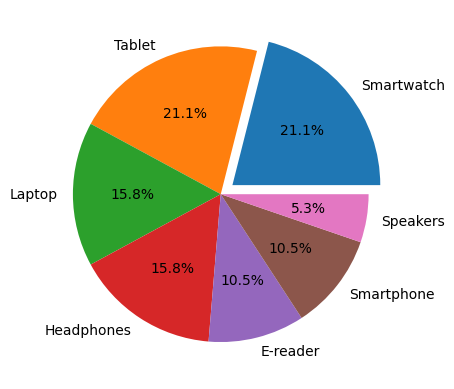

In [ ]:
import matplotlib.pyplot as plt

print(df['Product Purchased'].value_counts())

prudcts = df['Product Purchased'].value_counts().index


plt.pie(df['Product Purchased'].value_counts(), labels=prudcts, autopct='%1.1f%%', explode=explosions)

In [ ]:
df['Product Purchased'].value_counts().idxmax()

'Smartwatch'

In [ ]:
explosions = [0] * len(prudcts)
explosions

[0, 0, 0, 0, 0, 0, 0]

In [ ]:
maxidx = df['Product Purchased'].value_counts().index.to_list()

In [ ]:
maxidx.index( df['Product Purchased'].value_counts().idxmax())

0

In [ ]:
explosions[maxidx.index( df['Product Purchased'].value_counts().idxmax())] = 0.1

In [ ]:
df.to_csv('Electronics.csv', index=False)